In [1]:
# Standard libraries
import numpy as np
import json
from datetime import datetime

# Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider

# Own library
from quantum_gates.simulators import MrAndersonSimulator
from quantum_gates.gates import standard_gates
from quantum_gates.circuits import EfficientCircuit, AlternativeCircuit, Circuit
from quantum_gates.utilities import DeviceParameters
from quantum_gates.utilities import setup_backend

IBM_TOKEN = "56ce0886112e6a0e86ea8eb83e379902e1616cb99deb2ca3505aff78cabeece4757dd9a3e7589dbe9506a643f1876dbf78c2a3444c7a8be123ba413870a11060"

In [2]:
provider = IBMProvider(token=IBM_TOKEN)
backend = provider.get_backend('ibm_brisbane')
prop = backend.properties()

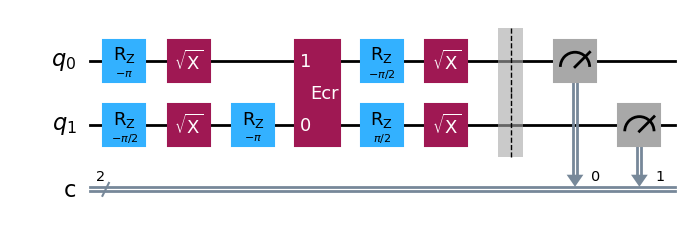

In [39]:
N_QUBIT = 2
N_BIT = 2

circ = QuantumCircuit(N_QUBIT,N_BIT)


circ.rz(-np.pi, 0)
circ.rz(-np.pi/2, 1)
circ.sx(0)
circ.sx(1)

circ.rz(-np.pi, 1)
circ.ecr(1,0)
circ.rz(-np.pi/2,0)
circ.rz(np.pi/2,1)
circ.sx(0)
circ.sx(1)

#circ.rz(np.pi/2,0)
#circ.rz(np.pi/2,1)



circ.barrier(range(N_QUBIT))
circ.measure(range(N_QUBIT),range(N_QUBIT))
circ.draw('mpl')

In [40]:
config = {
    "backend": {
        "hub": "ibm-q",
        "group": "open",
        "project": "main",
        "device_name": "ibmq_manila"
    },
    "run": {
        "shots": 1000,
        "qubits_layout": [0,1],
        "psi0": [1, 0, 0, 0]
    }
}

run_config = config["run"]
qubits_layout = run_config["qubits_layout"]
print(qubits_layout)

device_param = DeviceParameters(qubits_layout)
device_param.load_from_backend(backend)
device_param_lookup = device_param.__dict__()

[0, 1]


In [41]:
sim = MrAndersonSimulator(gates=standard_gates, CircuitClass=EfficientCircuit)

t_circ = transpile(
    circ,
    backend,
    scheduling_method='asap',
    initial_layout=qubits_layout,
    seed_transpiler=42
)

#t_circ.draw(output='mpl')

We only support a linear connectivity at the moment.


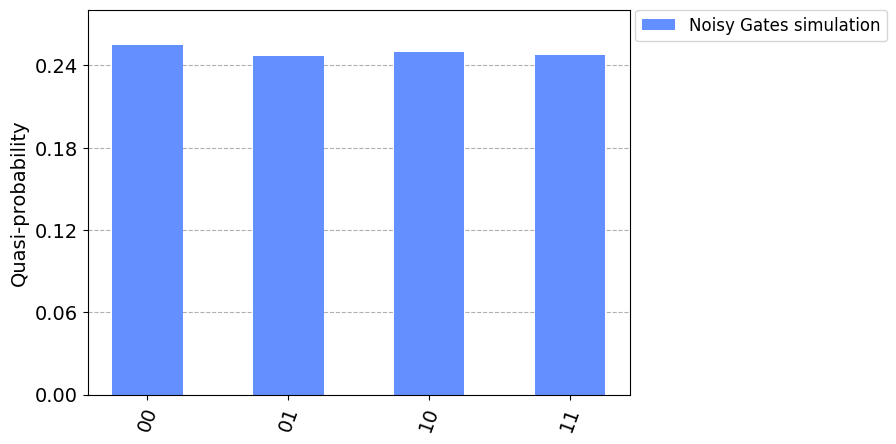

In [42]:
probs = sim.run(
    t_qiskit_circ=t_circ, 
    qubits_layout=qubits_layout, 
    psi0=np.array(run_config["psi0"]), 
    shots=run_config["shots"], 
    device_param=device_param_lookup,
    nqubit=N_QUBIT)

counts_ng = {format(i, 'b').zfill(2): probs[i] for i in range(0, 4)}

plot_histogram(counts_ng, bar_labels=False, legend=['Noisy Gates simulation'])